In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway

In [ ]:
data = pd.read_csv('Master Saved Data.csv')
data.dropna()
data = data[data['Level Name'] != 'Tutorial']
data.head()

,Player ID,Play Test,Hero Name,Level Name,Level Success,Level Time to Complete,Enemies Killed
0,0,Play Test 1,Assassin,CityRise,True,17.73,6
1,0,Play Test 1,Assassin,CityRise,True,13.62,6
2,0,Play Test 1,Assassin,CityRise,False,5.42,1
3,0,Play Test 1,Assassin,CityRise,True,19.65,6
4,0,Play Test 1,Assassin,CityRise,True,13.06,6


In [ ]:
data.describe()

,Player ID,Level Time to Complete,Enemies Killed
count,524.000000,524.000000,524.000000
mean,1.900763,10.196698,3.244275
std,2.046701,6.714958,2.118268
min,0.000000,1.470000,0.000000
25%,0.000000,5.157500,1.000000
50%,1.000000,9.775000,3.000000
75%,3.000000,12.395000,5.000000
max,6.000000,56.450000,6.000000


In [ ]:
grouped_data = data.groupby(['Play Test', 'Hero Name', 'Level Name'])['Level Time to Complete'].agg(['count', 'mean', 'std'])
print(grouped_data)

                                     count       mean        std
Play Test   Hero Name    Level Name                             
Play Test 1 Archer       CityHouse      23  12.430870   8.562161
                         CityRise       55  10.432000   6.044036
            Assassin     CityHouse      11  12.256364   7.056833
                         CityRise      200   8.049750   4.635533
            ShockSweeper CityHouse      31  12.822581   6.841878
                         CityRise        9  20.357778  10.222315
Play Test 2 Archer       CityHouse       8   9.432500   5.391607
                         CityRise       33   9.576970   9.079310
            Assassin     CityHouse      23   9.957826   2.397561
                         CityRise       76   9.561711   5.493788
            ShockSweeper CityHouse      27  12.525926   9.279335
                         CityRise       28  16.874643   8.251750


ANOVA Test: You can use scipy.stats.f_oneway or a more sophisticated approach like a multi-factor ANOVA to assess the differences in "Level Time to Complete" across groups. Here's an example with one-way ANOVA:

If the p-value is below a threshold (commonly 0.05), then you have evidence that there is a significant difference between the play tests for "Level Time to Complete."

In [ ]:
# Separate the data for each Play Test
playtest_1_times = data[(data['Play Test'] == 'Play Test 1') &
                (data['Hero Name'] == 'Assassin') &
                (data['Level Name'] == 'CityHouse')]['Level Time to Complete']
playtest_2_times = data[(data['Play Test'] == 'Play Test 2') &
                (data['Hero Name'] == 'Assassin') &
                (data['Level Name'] == 'CityHouse')]['Level Time to Complete']

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(playtest_1_times, playtest_2_times)

print(f"F-statistic: {f_statistic}, p-value: {p_value}")

F-statistic: 0.6901301222040285, p-value: 0.433537200892075


In [ ]:
playtest_1 = data[(data['Play Test'] == 'Play Test 1') &
                (data['Hero Name'] == 'Assassin') &
                (data['Level Name'] == 'CityRise')]['Level Time to Complete']

playtest_2 = data[(data['Play Test'] == 'Play Test 2') &
                (data['Hero Name'] == 'Assassin') &
                (data['Level Name'] == 'CityRise')]['Level Time to Complete']


# Perform Mann-Whitney U Test
stat, p = mannwhitneyu(playtest_1, playtest_2)

print(f'Mann-Whitney U Test Statistic: {stat}, p-value: {p}')

Mann-Whitney U Test Statistic: 5980.0, p-value: 0.017666389487441776


In [ ]:
# Assuming your DataFrame is named `data`
# Create a model that includes Play Test, Hero Name, and Level Name as factors
data_m = data.copy()
data_m = data_m.rename(columns={'Level Time to Complete': 'Level_Time_to_Complete',
                            'Play Test': 'Play_Test',
                            'Hero Name': 'Hero_Name',
                            'Level Name': 'Level_Name'})

# Create the model with renamed columns
model = ols('Level_Time_to_Complete ~ Play_Test * Hero_Name * Level_Name', data=data_m).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                      sum_sq     df          F        PR(>F)
Play_Test                           0.067450    1.0   0.001735  9.667947e-01
Hero_Name                        1792.347670    2.0  23.047381  2.605409e-10
Level_Name                         12.587064    1.0   0.323708  5.696371e-01
Play_Test:Hero_Name               103.336539    2.0   1.328780  2.657116e-01
Play_Test:Level_Name               25.620292    1.0   0.658891  4.173290e-01
Hero_Name:Level_Name              677.495138    2.0   8.711752  1.903208e-04
Play_Test:Hero_Name:Level_Name    137.719016    2.0   1.770897  1.712211e-01
Residual                        19908.596618  512.0        NaN           NaN


In [ ]:

# Get unique combinations of Hero Name and Level Name
combinations = data[['Hero Name', 'Level Name']].drop_duplicates()

for _, row in combinations.iterrows():
    hero = row['Hero Name']
    level = row['Level Name']

    playtest_1_times = data[(data['Play Test'] == 'Play Test 1') &
                            (data['Hero Name'] == hero) &
                            (data['Level Name'] == level)]['Level Time to Complete']

    playtest_2_times = data[(data['Play Test'] == 'Play Test 2') &
                            (data['Hero Name'] == hero) &
                            (data['Level Name'] == level)]['Level Time to Complete']

    if not playtest_1_times.empty and not playtest_2_times.empty:
        # Perform ANOVA
        f_stat, p_value = f_oneway(playtest_1_times, playtest_2_times)
        print(f'ANOVA for {hero} in {level}: F-statistic = {f_stat}, p-value = {p_value}')
    else:
        print(f'Insufficient data for {hero} in {level}')

ANOVA for Assassin in CityRise: F-statistic = 5.274767433823406, p-value = 0.02239120605194314
ANOVA for Assassin in CityHouse: F-statistic = 2.0146337849424096, p-value = 0.16545728311219726
ANOVA for ShockSweeper in CityRise: F-statistic = 1.0813735866558913, p-value = 0.30552112855718516
ANOVA for Archer in CityRise: F-statistic = 0.2812581515907122, p-value = 0.5972444996403377
ANOVA for Archer in CityHouse: F-statistic = 0.8519856720916107, p-value = 0.3636076735157555
ANOVA for ShockSweeper in CityHouse: F-statistic = 0.01952168810003208, p-value = 0.8893825025427423


In [ ]:
data_with_sucess = data[data['Level Success'] == True].copy()

# Get unique combinations of Hero Name and Level Name
combinations = data_with_sucess[['Hero Name', 'Level Name']].drop_duplicates()

for _, row in combinations.iterrows():
    hero = row['Hero Name']
    level = row['Level Name']

    playtest_1_times = data_with_sucess[(data_with_sucess['Play Test'] == 'Play Test 1') &
                            (data_with_sucess['Hero Name'] == hero) &
                            (data_with_sucess['Level Name'] == level)]['Level Time to Complete']

    playtest_2_times = data_with_sucess[(data_with_sucess['Play Test'] == 'Play Test 2') &
                            (data_with_sucess['Hero Name'] == hero) &
                            (data_with_sucess['Level Name'] == level)]['Level Time to Complete']

    if not playtest_1_times.empty and not playtest_2_times.empty:
        # Perform ANOVA
        f_stat, p_value = f_oneway(playtest_1_times, playtest_2_times)
        print(f'ANOVA for {hero} in {level}: F-statistic = {f_stat}, p-value = {p_value}')
    else:
        print(f'Insufficient data for {hero} in {level}')

ANOVA for Assassin in CityRise: F-statistic = 8.367356700503413, p-value = 0.004997307887828369
ANOVA for Assassin in CityHouse: F-statistic = 12.347847134695943, p-value = 0.002183432236119637
ANOVA for Archer in CityRise: F-statistic = 0.04174816534221906, p-value = 0.8395784921811935
ANOVA for Archer in CityHouse: F-statistic = 0.24998359253762584, p-value = 0.6220509224674842
ANOVA for ShockSweeper in CityRise: F-statistic = 0.20995658354759456, p-value = 0.6522850083456497
ANOVA for ShockSweeper in CityHouse: F-statistic = 0.039544157249386806, p-value = 0.8431973414685936


In [ ]:
data_without_sucess = data[data['Level Success'] == False].copy()
combinations = data_without_sucess[['Hero Name', 'Level Name']].drop_duplicates()

for _, row in combinations.iterrows():
    hero = row['Hero Name']
    level = row['Level Name']

    playtest_1_times = data_without_sucess[(data_without_sucess['Play Test'] == 'Play Test 1') &
                            (data_without_sucess['Hero Name'] == hero) &
                            (data_without_sucess['Level Name'] == level)]['Level Time to Complete']

    playtest_2_times = data_without_sucess[(data_without_sucess['Play Test'] == 'Play Test 2') &
                            (data_without_sucess['Hero Name'] == hero) &
                            (data_without_sucess['Level Name'] == level)]['Level Time to Complete']

    if not playtest_1_times.empty and not playtest_2_times.empty:
        # Perform ANOVA
        f_stat, p_value = f_oneway(playtest_1_times, playtest_2_times)
        print(f'ANOVA for {hero} in {level}: F-statistic = {f_stat}, p-value = {p_value}')
    else:
        print(f'Insufficient data for {hero} in {level}')

ANOVA for Assassin in CityRise: F-statistic = 2.500374251679575, p-value = 0.11542342880813236
ANOVA for Assassin in CityHouse: F-statistic = 0.0004376405920401897, p-value = 0.9837211193570804
ANOVA for ShockSweeper in CityRise: F-statistic = 0.45465439874957164, p-value = 0.5103916926760772
ANOVA for Archer in CityRise: F-statistic = 0.027761242427517246, p-value = 0.8682715314630257
ANOVA for Archer in CityHouse: F-statistic = 0.5633754947836875, p-value = 0.4867026194303486
ANOVA for ShockSweeper in CityHouse: F-statistic = 1.0661902152373905, p-value = 0.3491418637601195


In [ ]:
# Grouping by Play Test, Hero Name, and Level Name
summary = data[[data['Level Success'] == True]].groupby(['Play Test', 'Hero Name', 'Level Name'])['Level Time to Complete'].agg(['count', 'min', 'mean', 'max', 'std'])

print(summary)


                                     count   min       mean    max        std
Play Test   Hero Name    Level Name                                          
Play Test 1 Archer       CityHouse      23  4.53  12.430870  32.58   8.562161
                         CityRise       55  2.54  10.432000  40.04   6.044036
            Assassin     CityHouse      11  6.32  12.256364  31.53   7.056833
                         CityRise      200  2.00   8.049750  27.13   4.635533
            ShockSweeper CityHouse      31  7.28  12.822581  40.84   6.841878
                         CityRise        9  4.84  20.357778  41.85  10.222315
Play Test 2 Archer       CityHouse       8  5.71   9.432500  21.39   5.391607
                         CityRise       33  2.43   9.576970  37.99   9.079310
            Assassin     CityHouse      23  8.11   9.957826  19.69   2.397561
                         CityRise       76  1.47   9.561711  28.25   5.493788
            ShockSweeper CityHouse      27  7.32  12.525926  56.

In [ ]:
# Grouping by Play Test, Hero Name, and Level Name
successful_data = data[data['Level Success'] == True]

summary = successful_data.groupby(['Play Test', 'Hero Name', 'Level Name'])['Level Time to Complete'].agg(['count', 'min', 'mean', 'max', 'std'])

print(summary)


                                     count    min       mean    max        std
Play Test   Hero Name    Level Name                                           
Play Test 1 Archer       CityHouse      18   5.98  12.321111  31.38   7.720817
                         CityRise       22   8.13  13.417727  40.04   7.137832
            Assassin     CityHouse       3  10.59  19.290000  31.53  10.909610
                         CityRise       55   9.62  12.045455  19.65   2.209885
            ShockSweeper CityHouse      26   8.13  12.409231  40.84   6.571316
                         CityRise        7  15.41  23.430000  41.85   9.066798
Play Test 2 Archer       CityHouse       6   6.06  10.591667  21.39   5.850092
                         CityRise        8   7.69  14.048750  33.00   8.424767
            Assassin     CityHouse      19   8.11  10.022632  19.69   2.607431
                         CityRise       22   9.94  14.202727  28.25   4.319356
            ShockSweeper CityHouse      25   8.08  1

In [ ]:
# Grouping by Play Test, Hero Name, and Level Name with Level Success count
success_summary_pt = data.groupby(['Play Test', 'Level Success']).size().unstack(fill_value=0)
success_summary_pt.columns = ['Failures', 'Successes']
# Resetting index for a cleaner look
success_summary_pt = success_summary_pt.reset_index()
success_summary_pt['Success Percentage'] = (success_summary_pt['Successes'] / (success_summary_pt['Successes'] + success_summary_pt['Failures'])) * 100
# Clean print output with percentages
print(success_summary_pt.to_string(index=False, float_format='%.2f'))
print()

# Group by Hero Name and Level Success, and count occurrences
success_summary_h = data.groupby(['Hero Name', 'Level Success']).size().unstack(fill_value=0)

# Renaming columns for better readability
success_summary_h.columns = ['Failures', 'Successes']

# Resetting the index for a cleaner look
success_summary_h = success_summary_h.reset_index()

# Calculate percentage of successes
success_summary_h['Success Percentage'] = (success_summary_h['Successes'] / (success_summary_h['Successes'] + success_summary_h['Failures'])) * 100

# Clean print output with percentages
print(success_summary_h.to_string(index=False, float_format='%.2f'))

# Group by Level Name and Level Success, and count occurrences
success_summary_l = data.groupby(['Level Name', 'Level Success']).size().unstack(fill_value=0)

# Renaming columns for better readability
success_summary_l.columns = ['Failures', 'Successes']

# Resetting the index for a cleaner look
success_summary_l = success_summary_l.reset_index()

# Calculate percentage of successes
success_summary_l['Success Percentage'] = (success_summary_l['Successes'] / (success_summary_l['Successes'] + success_summary_l['Failures'])) * 100

# Clean print output with percentages
print(success_summary_l.to_string(index=False, float_format='%.2f'))




  Play Test  Failures  Successes  Success Percentage
Play Test 1       198        131               39.82
Play Test 2       102         93               47.69

   Hero Name  Failures  Successes  Success Percentage
      Archer        65         54               45.38
    Assassin       211         99               31.94
ShockSweeper        24         71               74.74
Level Name  Failures  Successes  Success Percentage
 CityHouse        26         97               78.86
  CityRise       274        127               31.67
Level Success                        False  True 
Play Test   Hero Name    Level Name              
Play Test 1 Archer       CityHouse       5     18
                         CityRise       33     22
            Assassin     CityHouse       8      3
                         CityRise      145     55
            ShockSweeper CityHouse       5     26
                         CityRise        2      7
Play Test 2 Archer       CityHouse       2      6
                  

In [ ]:
# Group by Play Test, Hero Name, Level Name, and Level Success, and count occurrences
success_summary = data.groupby(['Play Test', 'Hero Name', 'Level Name', 'Level Success']).size().unstack(fill_value=0)

# Renaming columns for better readability
success_summary.columns = ['Failures', 'Successes']

# Resetting the index for a cleaner look
success_summary = success_summary.reset_index()

# Calculate percentage of successes
success_summary['Success Percentage'] = (success_summary['Successes'] / (success_summary['Successes'] + success_summary['Failures'])) * 100

# Clean print output with percentages
print(success_summary.to_string(index=False, float_format='%.2f'))


  Play Test    Hero Name Level Name  Failures  Successes  Success Percentage
Play Test 1       Archer  CityHouse         5         18               78.26
Play Test 1       Archer   CityRise        33         22               40.00
Play Test 1     Assassin  CityHouse         8          3               27.27
Play Test 1     Assassin   CityRise       145         55               27.50
Play Test 1 ShockSweeper  CityHouse         5         26               83.87
Play Test 1 ShockSweeper   CityRise         2          7               77.78
Play Test 2       Archer  CityHouse         2          6               75.00
Play Test 2       Archer   CityRise        25          8               24.24
Play Test 2     Assassin  CityHouse         4         19               82.61
Play Test 2     Assassin   CityRise        54         22               28.95
Play Test 2 ShockSweeper  CityHouse         2         25               92.59
Play Test 2 ShockSweeper   CityRise        15         13               46.43

In [ ]:
# Group by Play Test, Hero Name, Level Name, and Level Success, and count occurrences
success_summary = data.groupby(['Play Test', 'Hero Name', 'Level Name', 'Level Success']).size().unstack(fill_value=0)

# Renaming columns for better readability
success_summary.columns = ['Failures', 'Successes']

# Calculate percentage of successes
success_summary['Success Percentage'] = (success_summary['Successes'] / (success_summary['Successes'] + success_summary['Failures'])) * 100

# Resetting the index for a cleaner look
success_summary = success_summary.reset_index()

# Pivoting to compare Playtest 1 and Playtest 2 side by side
pivot_success_summary = success_summary.pivot_table(index=['Hero Name', 'Level Name'], columns='Play Test', values=['Success Percentage'])

# Clean print output
print(pivot_success_summary.to_string(float_format='%.2f'))


                        Success Percentage            
Play Test                      Play Test 1 Play Test 2
Hero Name    Level Name                               
Archer       CityHouse               78.26       75.00
             CityRise                40.00       24.24
Assassin     CityHouse               27.27       82.61
             CityRise                27.50       28.95
ShockSweeper CityHouse               83.87       92.59
             CityRise                77.78       46.43


In [ ]:
# Grouping by Hero Name and Level Name to sum enemies killed
enemies_killed_summary = data.groupby(['Play Test', 'Hero Name', 'Level Name'])['Enemies Killed '].sum()

print(enemies_killed_summary)


Play Test    Hero Name     Level Name
Play Test 1  Archer        CityHouse      27
                           CityRise      164
             Assassin      CityHouse       5
                           CityRise      165
             ShockSweeper  CityHouse       6
Play Test 2  Archer        CityHouse       9
                           CityRise       51
             Assassin      CityRise      119
             ShockSweeper  CityRise       10
Name: Enemies Killed , dtype: int64


In [ ]:
pivot_table = data.pivot_table(values='Level Time to Complete', index=['Hero Name', 'Level Name'], columns='Play Test', aggfunc='mean')

print(pivot_table)


Play Test                Play Test 1  Play Test 2
Hero Name    Level Name                          
Archer       CityHouse     12.430870     9.432500
             CityRise      10.432000     9.576970
Assassin     CityHouse     12.256364     9.957826
             CityRise       8.049750     9.561711
ShockSweeper CityHouse     12.822581    12.525926
             CityRise      20.357778    16.874643


In [ ]:
# Crosstab summarizing the success rate across play tests and heroes
crosstab = pd.crosstab([data['Hero Name'], data['Level Name']], data['Play Test'], values=data['Level Success'], aggfunc='sum').fillna(0)

print(crosstab)


Play Test                Play Test 1  Play Test 2
Hero Name    Level Name                          
Archer       CityHouse            18            6
             CityRise             22            8
Assassin     CityHouse             3           19
             CityRise             55           22
ShockSweeper CityHouse            26           25
             CityRise              7           13


In [ ]:
# Correlation matrix for numeric variables
correlation_matrix = data[['Level Time to Complete', 'Enemies Killed']].corr()

print(correlation_matrix)


                        Level Time to Complete  Enemies Killed
Level Time to Complete                1.000000        0.569009
Enemies Killed                        0.569009        1.000000


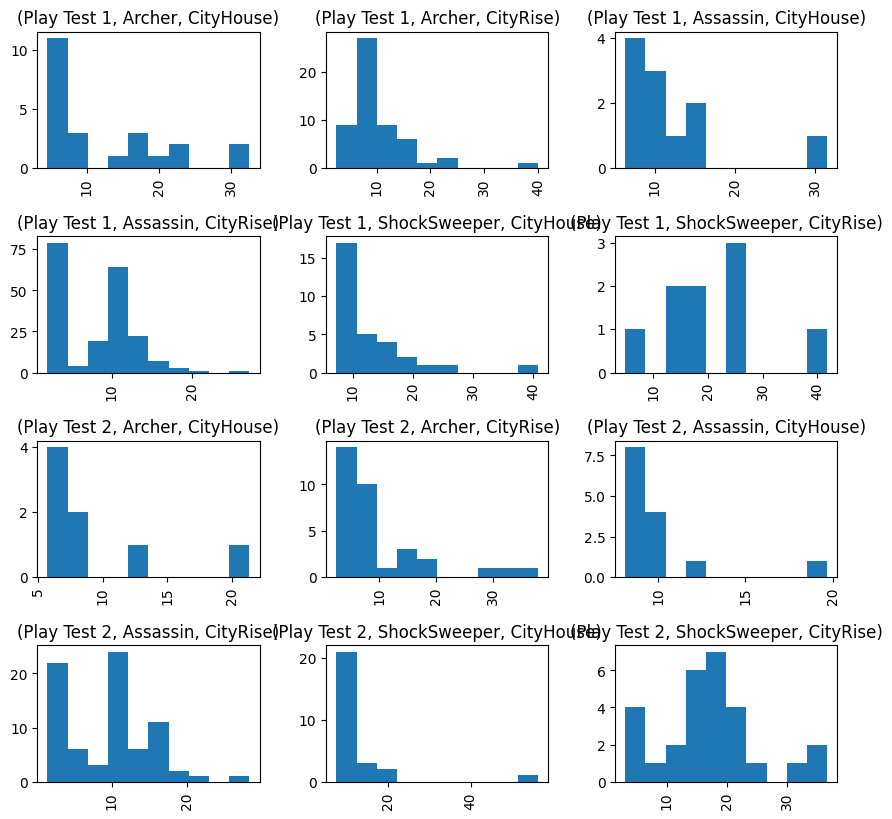

In [ ]:
# Histogram of level times for each play test
data.hist(column='Level Time to Complete', by=['Play Test', 'Hero Name', 'Level Name'], bins=10, figsize=(20,15))
plt.show()


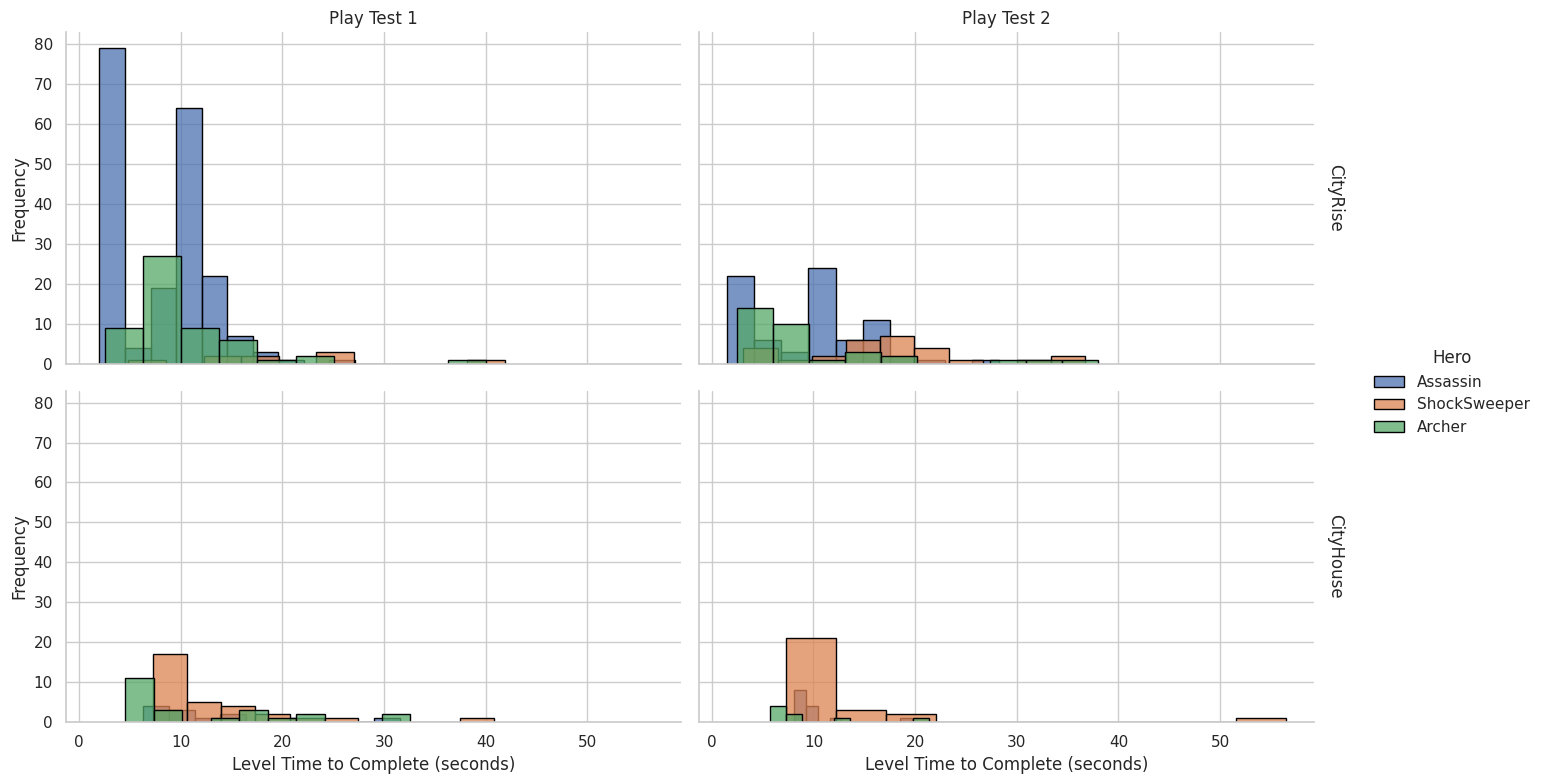

In [ ]:
sns.set(style="whitegrid")

# Create the histogram with enhanced aesthetics
g = sns.FacetGrid(data, col="Play Test", row="Level Name", hue="Hero Name", margin_titles=True, height=4, aspect=1.5)
g.map(sns.histplot, "Level Time to Complete", bins=10, kde=False, edgecolor="black")

# Set axis labels and titles
g.set_axis_labels("Level Time to Complete (seconds)", "Frequency")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Add legends to the plots
g.add_legend(title="Hero", bbox_to_anchor=(1, 0.5), loc="center left")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

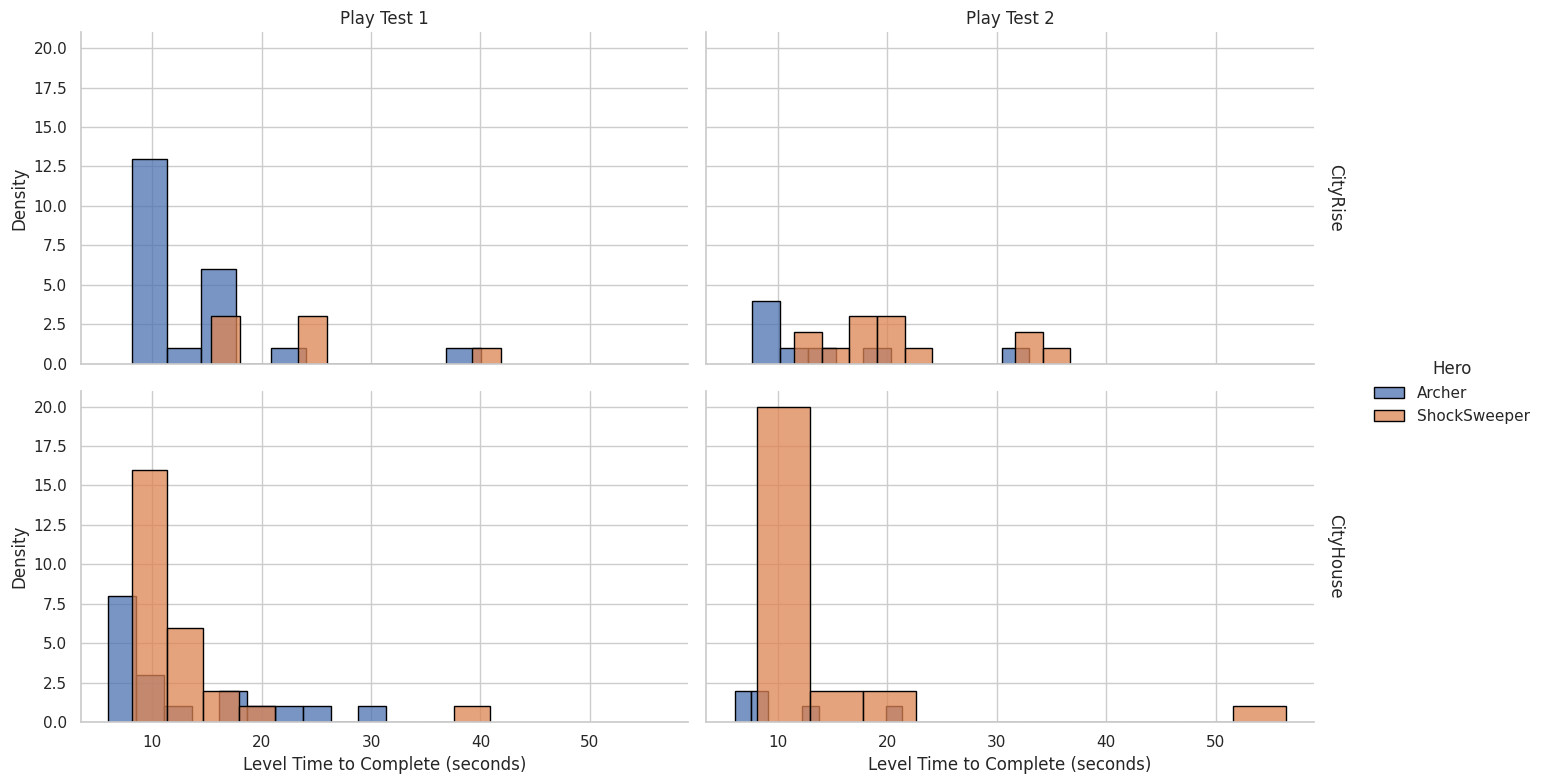

In [ ]:
# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")
data_s = data[data['Level Success'] == True].copy()
data_s = data_s[data_s['Hero Name'] != 'Assassin']

# Create the histogram with normalized counts
g = sns.FacetGrid(data_s, col="Play Test", row="Level Name", hue="Hero Name", margin_titles=True, height=4, aspect=1.5)
g.map(sns.histplot, "Level Time to Complete", bins=10, kde=False, edgecolor="black")

# Set axis labels and titles
g.set_axis_labels("Level Time to Complete (seconds)", "Density")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Add legends to the plots
g.add_legend(title="Hero", bbox_to_anchor=(1, 0.5), loc="center left")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

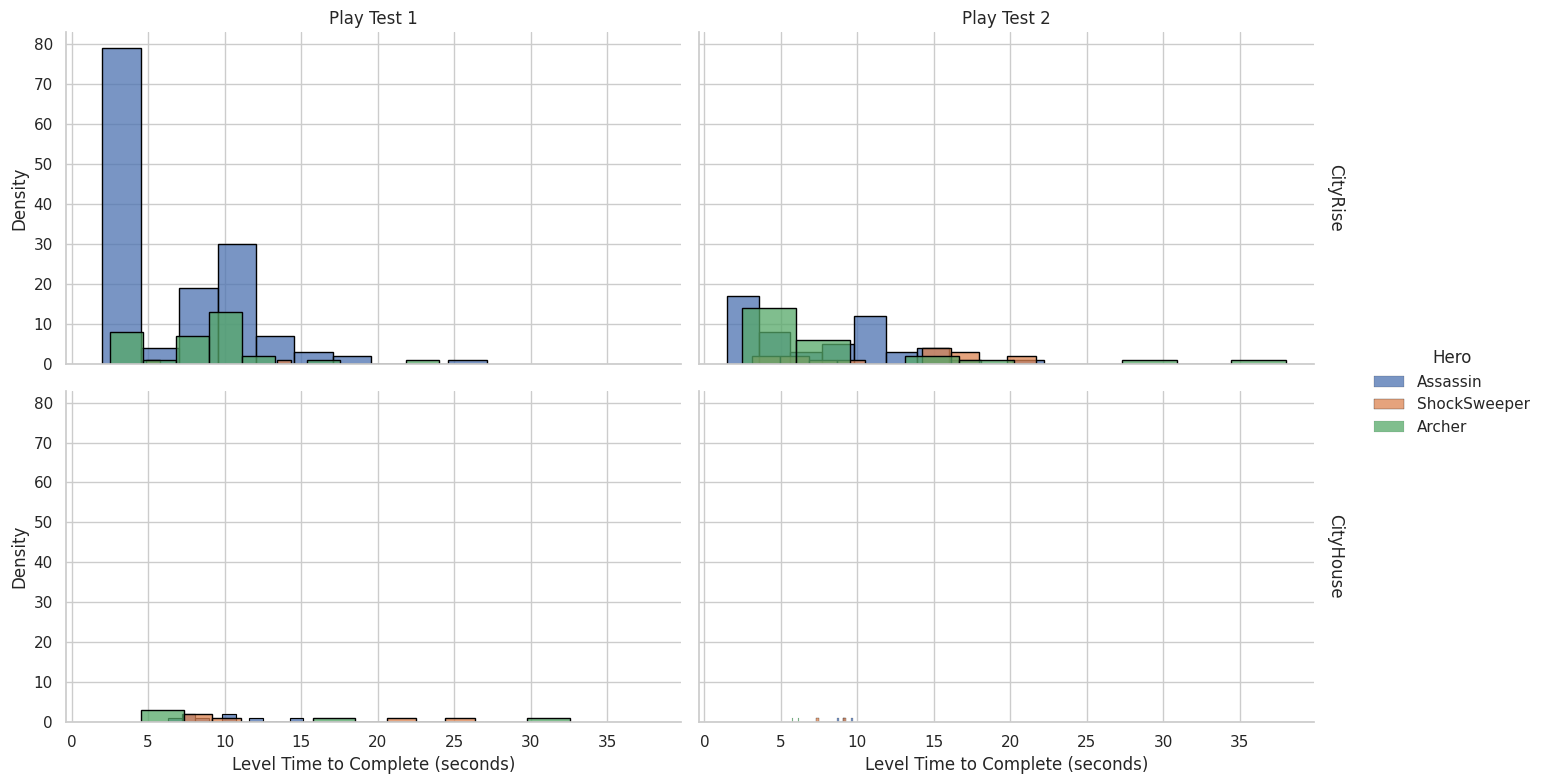

In [ ]:
# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")
data_s = data[data['Level Success'] == False].copy()
# Create the histogram with normalized counts
g = sns.FacetGrid(data_s, col="Play Test", row="Level Name", hue="Hero Name", margin_titles=True, height=4, aspect=1.5)
g.map(sns.histplot, "Level Time to Complete", bins=10, kde=False, edgecolor="black")

# Set axis labels and titles
g.set_axis_labels("Level Time to Complete (seconds)", "Density")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Add legends to the plots
g.add_legend(title="Hero", bbox_to_anchor=(1, 0.5), loc="center left")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

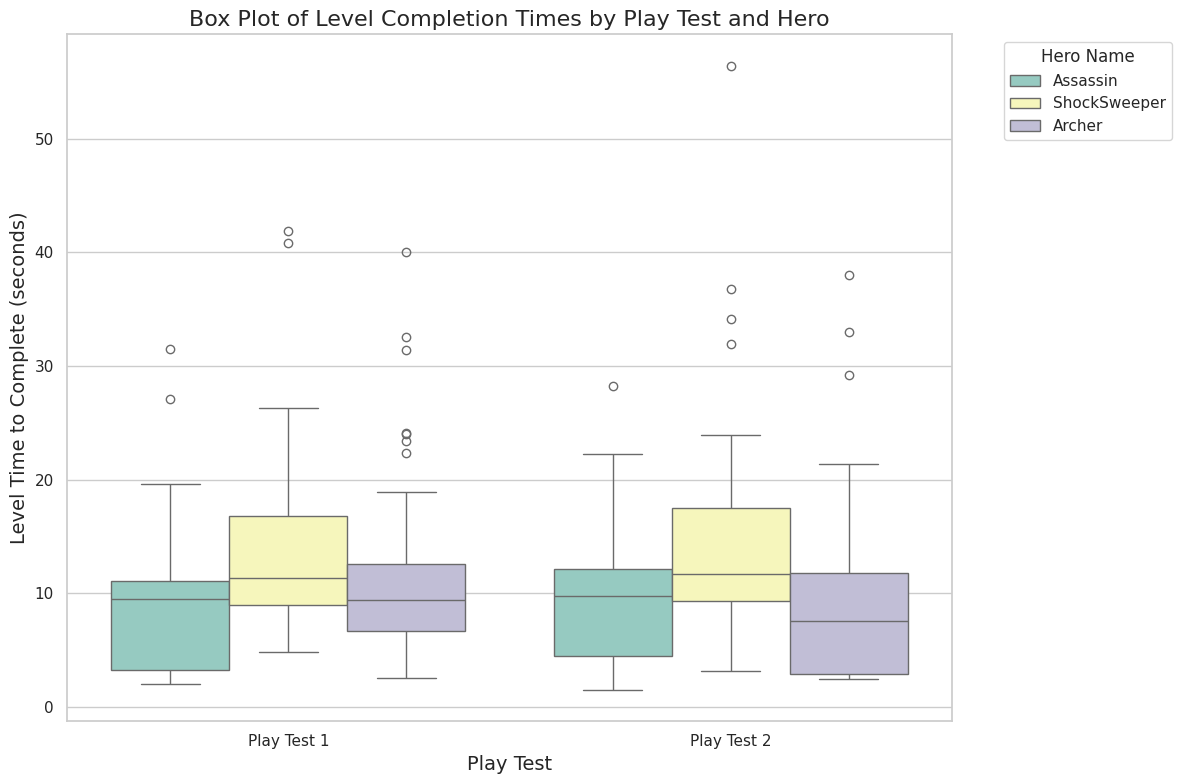

In [ ]:
# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x="Play Test", y="Level Time to Complete", hue="Hero Name", data=data, palette="Set3")

# Add titles and labels
plt.title("Box Plot of Level Completion Times by Play Test and Hero", fontsize=16)
plt.xlabel("Play Test", fontsize=14)
plt.ylabel("Level Time to Complete (seconds)", fontsize=14)

# Add a legend and adjust its position
plt.legend(title="Hero Name", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

<ipython-input-40-ec5715150b30>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Play_Test', y='Level_Time_to_Complete', hue='Hero_Name',


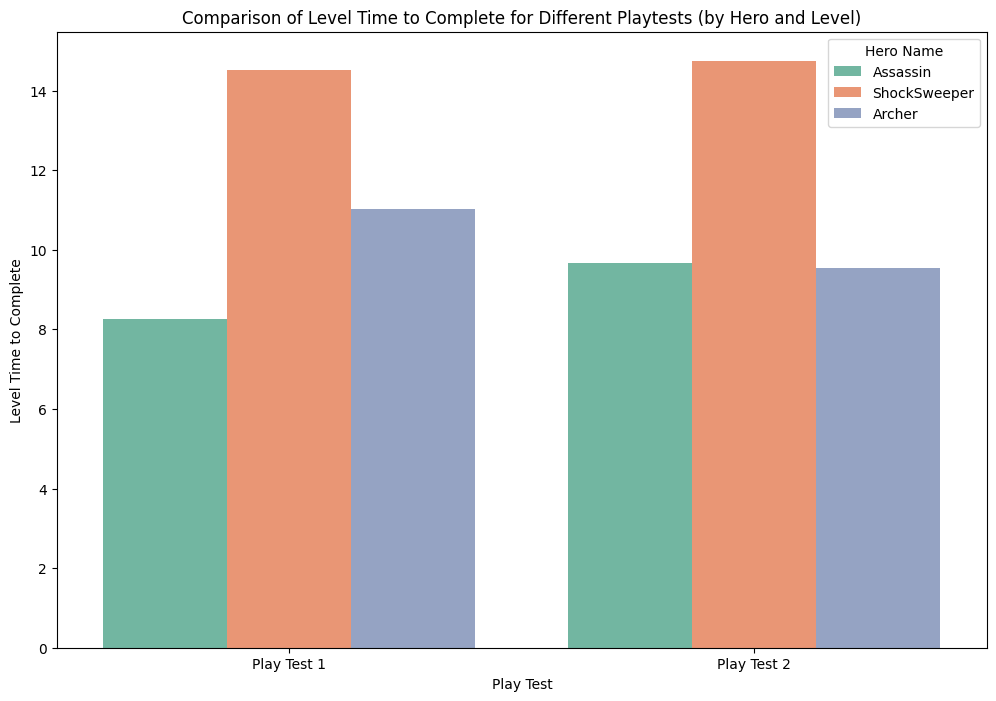

In [ ]:
data_m = data.rename(columns={'Level Time to Complete': 'Level_Time_to_Complete',
                              'Play Test': 'Play_Test',
                              'Hero Name': 'Hero_Name',
                              'Level Name': 'Level_Name'})

data_m_cr = data_m[data_m['Level_Name']=='CityRise']
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Play_Test', y='Level_Time_to_Complete', hue='Hero_Name',
            data=data_m, ci=None, palette='Set2')

# Customize the plot
plt.title('Comparison of Level Time to Complete for Different Playtests (by Hero and Level)')
plt.xlabel('Play Test')
plt.ylabel('Level Time to Complete')
plt.legend(title='Hero Name')

# Show plot
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axis

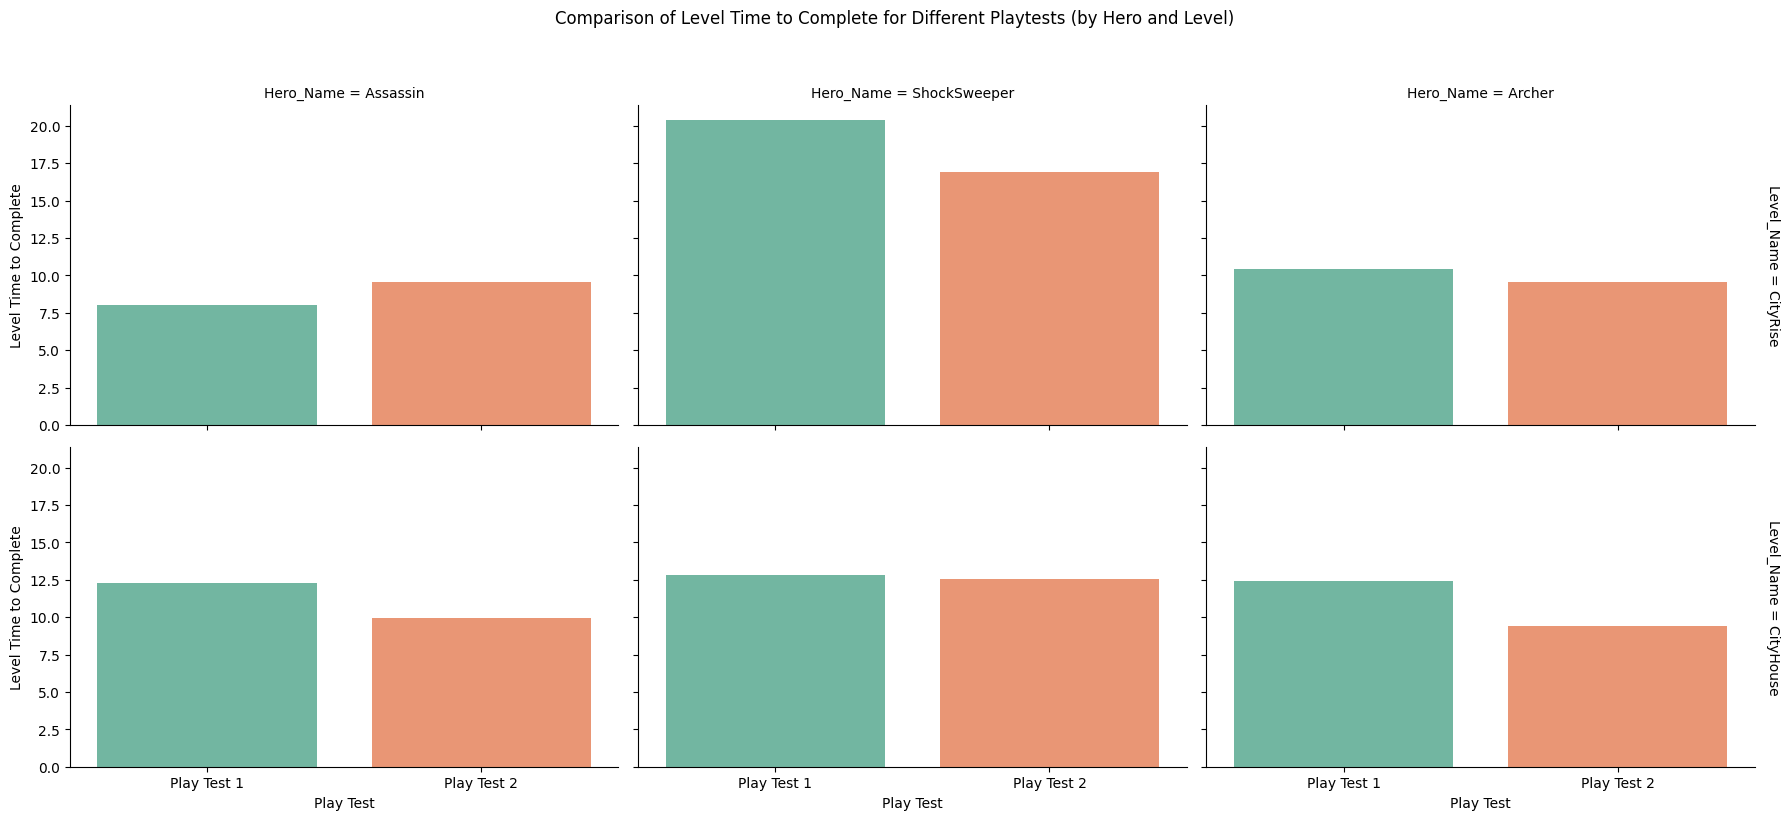

In [ ]:
# Plotting with FacetGrid to compare Level_Time_to_Complete across Play Tests
g = sns.FacetGrid(data_m, col="Hero_Name", row="Level_Name", margin_titles=True, height=4, aspect=1.5)
g.map(sns.barplot, "Play_Test", "Level_Time_to_Complete", order=sorted(data_m['Play_Test'].unique()), ci=None, palette='Set2')

# Customize the plot
g.set_axis_labels("Play Test", "Level Time to Complete")
g.set_titles("{row_name} | {col_name}")
g.fig.suptitle('Comparison of Level Time to Complete for Different Playtests (by Hero and Level)', y=1.02)

# Adjust layout
plt.subplots_adjust(top=0.9)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axis

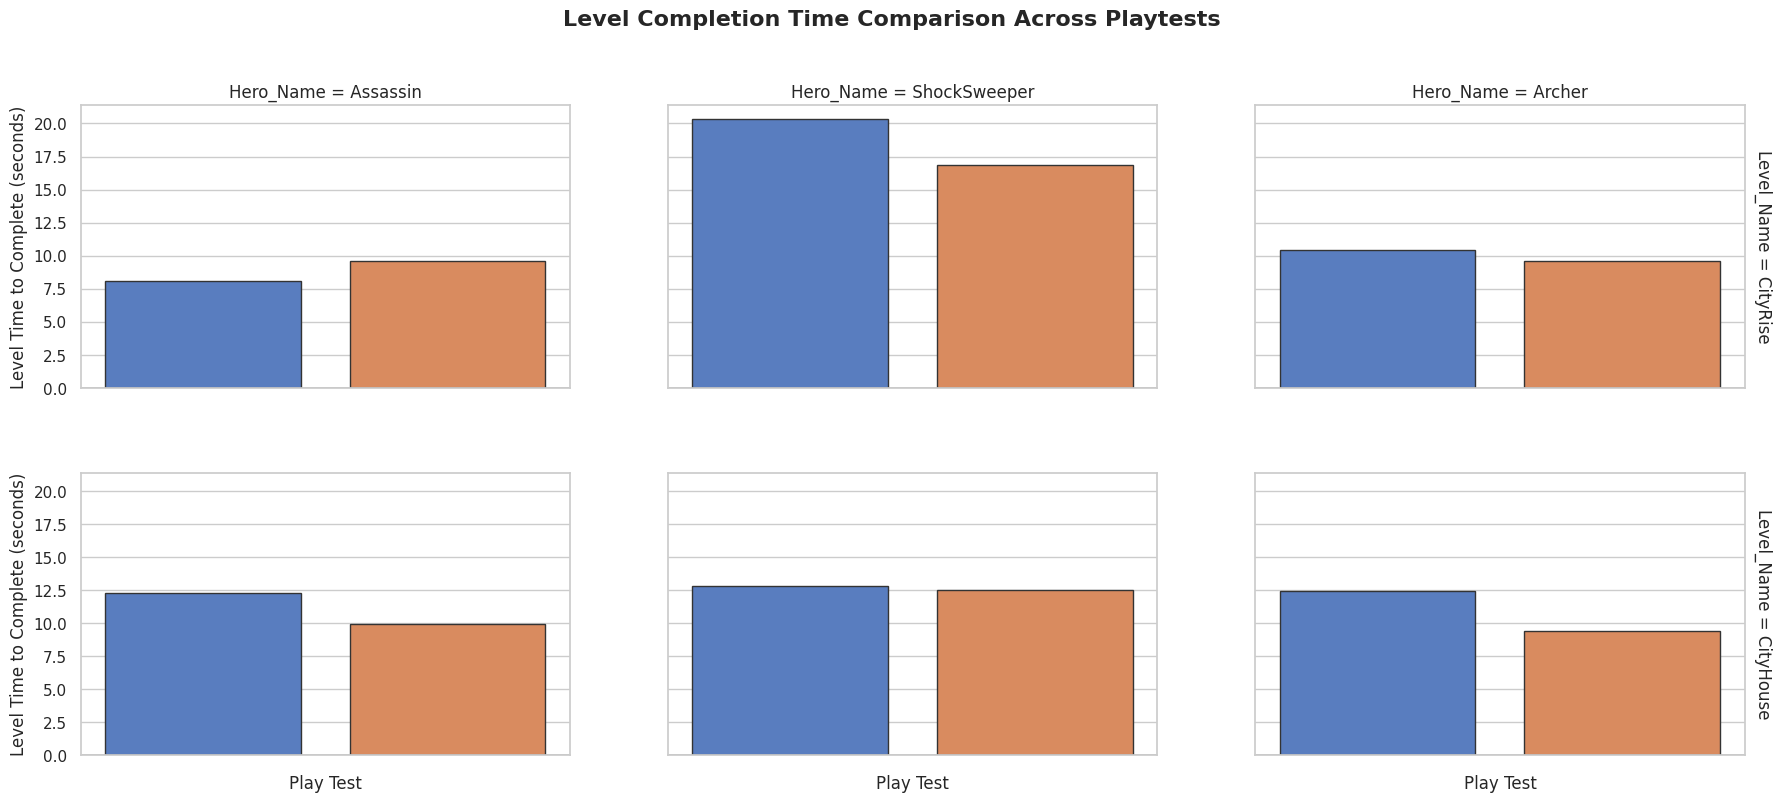

In [ ]:
# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create the FacetGrid
g = sns.FacetGrid(data_m, col="Hero_Name", row="Level_Name", margin_titles=True, height=4, aspect=1.5, despine=False)

# Map the barplot onto the grid
g.map(sns.barplot, "Play_Test", "Level_Time_to_Complete", order=sorted(data_m['Play_Test'].unique()),
      ci=None, palette="muted", edgecolor=".2")

# Add titles and labels
g.set_axis_labels("Play Test", "Level Time to Complete (seconds)")
g.set_titles("{row_name} | {col_name}")

# Customize the plot with gridlines, better labels, and color tweaks
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate x-axis labels for better readability
    ax.axhline(0, color="black", linewidth=1)  # Add a line at y=0 for reference

# Add a central title and adjust the layout
g.fig.suptitle('Level Completion Time Comparison Across Playtests', fontsize=16, fontweight='bold', y=1.02)
plt.subplots_adjust(top=0.9, hspace=0.3, wspace=0.2)

# Show the plot
plt.show()

<ipython-input-43-c244facd3353>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Play_Test', y='Enemies Killed', hue='Hero_Name',


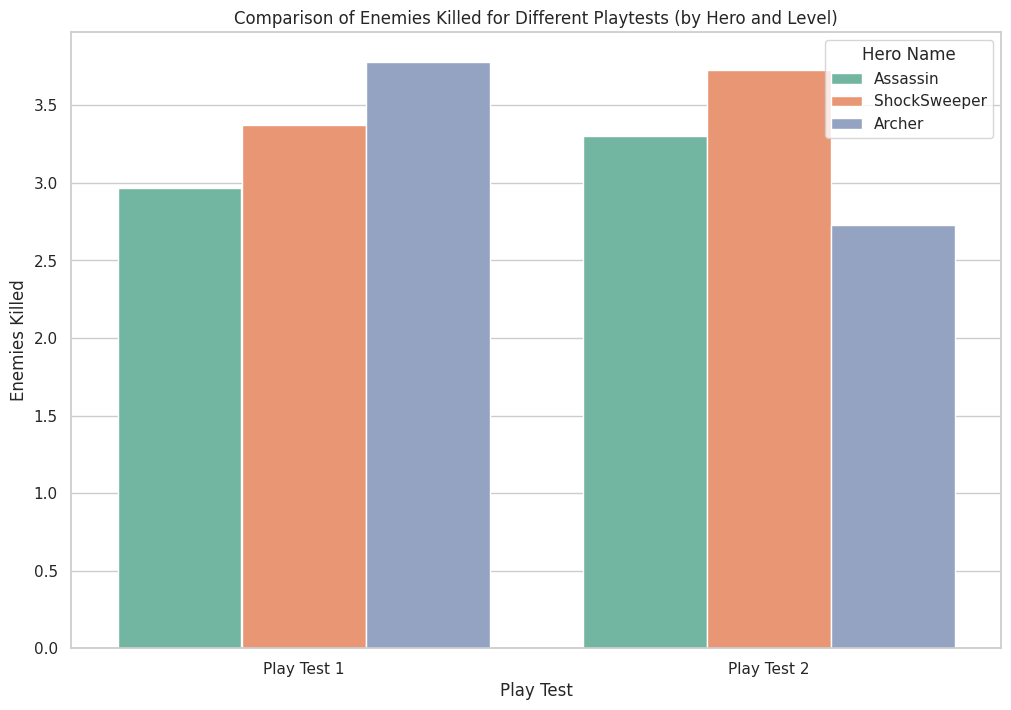

In [ ]:
# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Play_Test', y='Enemies Killed', hue='Hero_Name',
            data=data_m, ci=None, palette='Set2')

# Customize the plot
plt.title('Comparison of Enemies Killed for Different Playtests (by Hero and Level)')
plt.xlabel('Play Test')
plt.ylabel('Enemies Killed')
plt.legend(title='Hero Name')

# Show plot
plt.show()